In [ ]:
%pip install pyarrow pandas

In [ ]:
%pip install lightgbm

In [ ]:
%pip install xgboost

In [ ]:
%pip install catboost

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import glob
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import seaborn as sns

import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import catboost
from catboost import CatBoostRegressor

In [2]:
import os
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

Current working directory: c:\Users\felic\OneDrive\MicronDataChallenge


In [ ]:
# # List all Parquet files in a directory
# file_list = glob.glob("./train/metrology_data*.parquet")

# # Read and concatenate all Parquet files
# meas_df = pd.concat([pd.read_parquet(file) for file in file_list])

# # Save to a new Parquet file
# meas_df.to_parquet("meas_combined.parquet", index=False)

In [ ]:
# # List all Parquet files in a directory
# file_list = glob.glob("./train/run_data_*.parquet")

# # Read and concatenate all Parquet files
# run_df = pd.concat([pd.read_parquet(file) for file in file_list])

# # Save to a new Parquet file
# run_df.to_parquet("run_combined.parquet", index=False)

In [ ]:
# # List all Parquet files in a directory
# file_list = glob.glob("./train/incoming_run_data_*.parquet")

# # Read and concatenate all Parquet files
# incom_df = pd.concat([pd.read_parquet(file) for file in file_list])

# # Save to a new Parquet file
# incom_df.to_parquet("incom_run_combined.parquet", index=False)

In [9]:
meas_df      = pd.read_parquet("meas_combined.parquet")

In [10]:
incom_run_df  = pd.read_parquet("incom_run_combined.parquet")

In [11]:
run_df       = pd.read_parquet("run_combined.parquet")

# Exploratory Data Analysis

Gathering data on run_df, incoming_df and meas_df

In [6]:
df1 = run_df
df2 = incom_run_df
df3 = meas_df

In [ ]:
df1.head()

,Tool ID,Run Start Time,Run End Time,Run ID,Process Step,Consumable Life,Step ID,Time Stamp,Sensor Name,Sensor Value
0,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_0,2024-01-01 00:00:00.000000000,Sensor_A,-0.061105
1,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_0,2024-01-01 00:00:01.000000002,Sensor_A,-0.040894
2,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_0,2024-01-01 00:00:01.999999997,Sensor_A,0.005357
3,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_1,2024-01-01 00:00:03.000000000,Sensor_A,-0.029941
4,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_1,2024-01-01 00:00:04.000000002,Sensor_A,-0.098098


In [ ]:
df2.head()

,Tool ID,Run Start Time,Run End Time,Run ID,Process Step,Step ID,Time Stamp,Sensor Name,Sensor Value
0,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2023-12-31,2023-12-31 00:12:22,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,Step_0,2023-12-31 00:00:00.000000000,Sensor_1,202.660553
1,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2023-12-31,2023-12-31 00:12:22,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,Step_0,2023-12-31 00:00:01.000000002,Sensor_1,202.660553
2,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2023-12-31,2023-12-31 00:12:22,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,Step_0,2023-12-31 00:00:01.999999997,Sensor_1,202.660553
3,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2023-12-31,2023-12-31 00:12:22,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,Step_1,2023-12-31 00:00:03.000000000,Sensor_1,202.660553
4,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2023-12-31,2023-12-31 00:12:22,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,Step_1,2023-12-31 00:00:04.000000002,Sensor_1,202.660553


In [36]:
df3.head()

,Run ID,Run Start Time,Run End Time,X_index,Y_index,X,Y,Point Index,Measurement
0,00862337-2cc0-5b34-b5e1-45588e935c39,2024-01-02 04:45:25,2024-01-02 04:58:00,1,23,-143.877551,-9.183673,3,10.006534
1,00862337-2cc0-5b34-b5e1-45588e935c39,2024-01-02 04:45:25,2024-01-02 04:58:00,1,29,-143.877551,27.551020,48,10.002181
2,00862337-2cc0-5b34-b5e1-45588e935c39,2024-01-02 04:45:25,2024-01-02 04:58:00,2,34,-137.755102,58.163265,43,10.031223
3,00862337-2cc0-5b34-b5e1-45588e935c39,2024-01-02 04:45:25,2024-01-02 04:58:00,3,14,-131.632653,-64.285714,20,10.055888
4,00862337-2cc0-5b34-b5e1-45588e935c39,2024-01-02 04:45:25,2024-01-02 04:58:00,5,39,-119.387755,88.775510,8,10.089505


In [23]:
df1.info()
print("Shape:", df1.shape)
print("Columns:", df1.columns.tolist())
print(df1.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41220750 entries, 0 to 41220749
Data columns (total 11 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Tool ID          object        
 1   Run Start Time   datetime64[ns]
 2   Run End Time     datetime64[ns]
 3   Run ID           object        
 4   Process Step     object        
 5   Consumable Life  float32       
 6   Step ID          object        
 7   Time Stamp       datetime64[ns]
 8   Sensor Name      object        
 9   Sensor Value     float32       
 10  Time_utc         datetime64[ns]
dtypes: datetime64[ns](4), float32(2), object(5)
memory usage: 3.1+ GB
Shape: (41220750, 11)
Columns: ['Tool ID', 'Run Start Time', 'Run End Time', 'Run ID', 'Process Step', 'Consumable Life', 'Step ID', 'Time Stamp', 'Sensor Name', 'Sensor Value', 'Time_utc']
Tool ID                    object
Run Start Time     datetime64[ns]
Run End Time       datetime64[ns]
Run ID                     object
Process

In [ ]:
#check number of null values

df1.isnull().sum()

Tool ID            0
Run Start Time     0
Run End Time       0
Run ID             0
Process Step       0
Consumable Life    0
Step ID            0
Time Stamp         0
Sensor Name        0
Sensor Value       0
Time_utc           0
dtype: int64

In [20]:
#check number of duplicated values

df1.duplicated().sum()

0

In [27]:
df1.describe(include='object')

# Value counts
for col in df1.select_dtypes(include='object').columns:
    print(f"\n{col} value counts:\n", df1[col].value_counts())


Tool ID value counts:
 5116a75f-0543-502f-8278-2b2496d337d2    2253105
1914935a-df63-54c2-9c47-da905244e631    2251365
bb7e0385-0227-575a-9894-dacc8bf07f2a    2249430
683e5405-4b93-5160-be90-d3d5b0d9287a    2248140
4738fd3d-8fc7-59fd-85a7-eec6efb4bfae    2246790
db66ded5-0f4f-5179-b8e7-4673304ddff1    2244840
e4838ac1-3788-50bf-bbca-04cf339ec369    2244480
08e35986-3a0a-5274-8990-4ad303be9d5f    2241630
b3439d8e-290b-59a4-96a5-53348288f6a9    2241630
8060e8e1-504a-5138-a9f0-e2770bd61ba1    2235645
ac40636d-b491-5620-8d16-9aad56e5c4d3    2235450
a060c807-dbdb-5de3-9cd7-0c596234a3d7    2233815
d7291410-f34f-5cee-b3a1-0c60bb854423    2232780
ad28cd71-3811-543c-80a1-a440468a49d7    2231955
8a1010f8-7e9e-52ba-8586-2eac7e68eaee    2224380
30476bd4-f093-56c9-8cd1-23cf7f39ce5f    2219490
c7f536aa-a2fc-54b4-9b98-9f01793c9b5d    1798890
1b314ddd-198a-5cd5-90ae-933b947d013d    1795215
3cb39167-0519-578a-846d-7132592965d3    1791720
Name: Tool ID, dtype: int64

Run ID value counts:
 28eaf4dc-d95b

In [7]:
print('Number of Run ID:', df1["Run ID"].nunique())
print('Number of Tool ID:', df1["Tool ID"].nunique())
print('Number of Process Steps:', df1["Process Step"].nunique())
print('Number of Step ID:', df1["Step ID"].nunique())
print('Number of Sensor Name:', df1["Sensor Name"].nunique())

Number of Run ID: 4140
Number of Tool ID: 19
Number of Process Steps: 1
Number of Step ID: 13
Number of Sensor Name: 15


In [187]:
run_counts = run_df.groupby("Tool ID")["Run ID"].nunique()
print(run_counts)

Tool ID
08e35986-3a0a-5274-8990-4ad303be9d5f    225
1914935a-df63-54c2-9c47-da905244e631    225
1b314ddd-198a-5cd5-90ae-933b947d013d    180
30476bd4-f093-56c9-8cd1-23cf7f39ce5f    225
3cb39167-0519-578a-846d-7132592965d3    180
4738fd3d-8fc7-59fd-85a7-eec6efb4bfae    225
5116a75f-0543-502f-8278-2b2496d337d2    225
683e5405-4b93-5160-be90-d3d5b0d9287a    225
8060e8e1-504a-5138-a9f0-e2770bd61ba1    225
8a1010f8-7e9e-52ba-8586-2eac7e68eaee    225
a060c807-dbdb-5de3-9cd7-0c596234a3d7    225
ac40636d-b491-5620-8d16-9aad56e5c4d3    225
ad28cd71-3811-543c-80a1-a440468a49d7    225
b3439d8e-290b-59a4-96a5-53348288f6a9    225
bb7e0385-0227-575a-9894-dacc8bf07f2a    225
c7f536aa-a2fc-54b4-9b98-9f01793c9b5d    180
d7291410-f34f-5cee-b3a1-0c60bb854423    225
db66ded5-0f4f-5179-b8e7-4673304ddff1    225
e4838ac1-3788-50bf-bbca-04cf339ec369    225
Name: Run ID, dtype: int64


In [ ]:
run_counts = run_df.groupby("Time Stamp")["Run ID"].nunique()
print(run_counts)
# run_counts.to_csv("run_counts_by_timestamp.csv")


Time Stamp
2024-01-01 00:00:00.000000000    18
2024-01-01 00:00:01.000000002    18
2024-01-01 00:00:01.999999997    18
2024-01-01 00:00:03.000000000    18
2024-01-01 00:00:04.000000002    18
                                 ..
2024-01-04 04:50:13.999999998     1
2024-01-04 04:50:15.000000000     1
2024-01-04 04:50:16.000000002     1
2024-01-04 04:50:16.999999997     1
2024-01-04 04:50:18.000000000     1
Name: Run ID, Length: 181429, dtype: int64


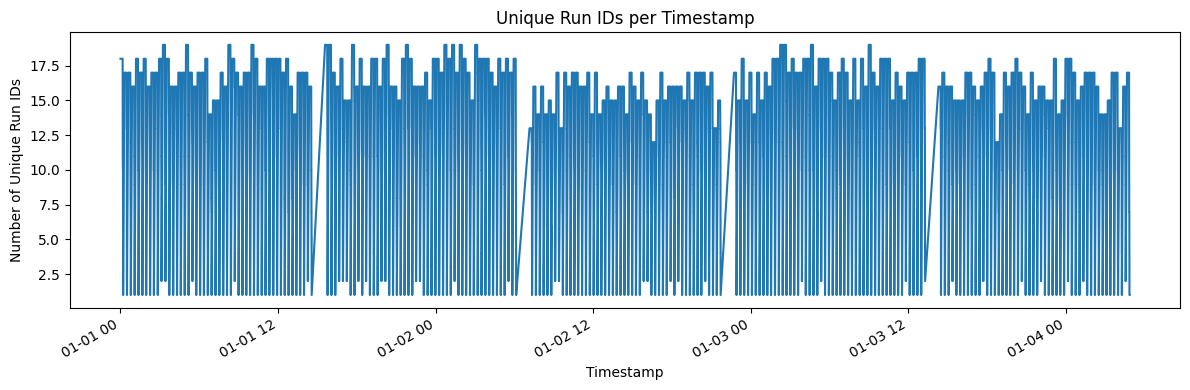

In [205]:
run_counts.plot(figsize=(12, 4), title="Unique Run IDs per Timestamp")
plt.xlabel("Timestamp")
plt.ylabel("Number of Unique Run IDs")
plt.tight_layout()
plt.show()

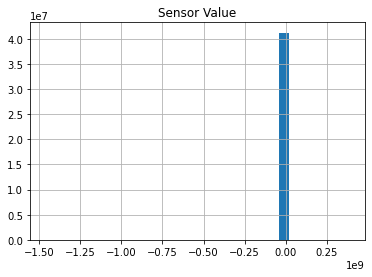

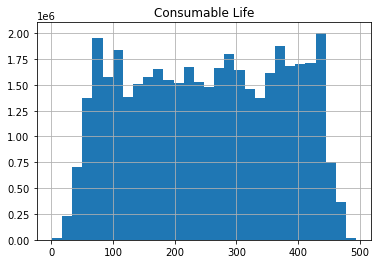

In [44]:
# Distribution plot for Sensor value and Consumable life

df1['Sensor Value'].hist(bins=30, label='Sensor Value')
plt.title('Sensor Value')
plt.show()

df1['Consumable Life'].hist(bins=30, label='Consumable Life')
plt.title('Consumable Life')
plt.show()

In [29]:
df2.info()
print("Shape:", df2.shape)
print("Columns:", df2.columns.tolist())
print(df2.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82896506 entries, 0 to 82896505
Data columns (total 9 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Tool ID         object        
 1   Run Start Time  datetime64[ns]
 2   Run End Time    datetime64[ns]
 3   Run ID          object        
 4   Process Step    object        
 5   Step ID         object        
 6   Time Stamp      datetime64[ns]
 7   Sensor Name     object        
 8   Sensor Value    float32       
dtypes: datetime64[ns](3), float32(1), object(5)
memory usage: 5.2+ GB
Shape: (82896506, 9)
Columns: ['Tool ID', 'Run Start Time', 'Run End Time', 'Run ID', 'Process Step', 'Step ID', 'Time Stamp', 'Sensor Name', 'Sensor Value']
Tool ID                   object
Run Start Time    datetime64[ns]
Run End Time      datetime64[ns]
Run ID                    object
Process Step              object
Step ID                   object
Time Stamp        datetime64[ns]
Sensor Name               obje

In [30]:
#check number of null values

df2.isnull().sum()

Tool ID           0
Run Start Time    0
Run End Time      0
Run ID            0
Process Step      0
Step ID           0
Time Stamp        0
Sensor Name       0
Sensor Value      0
dtype: int64

In [21]:
#check number of duplicated values

df2.duplicated().sum()

0

In [34]:
df2.describe(include='object')

# Value counts
for col in df2.select_dtypes(include='object').columns:
    print(f"\n{col} value counts:\n", df2[col].value_counts())


Tool ID value counts:
 8a1010f8-7e9e-52ba-8586-2eac7e68eaee    4663135
ac40636d-b491-5620-8d16-9aad56e5c4d3    4616887
1914935a-df63-54c2-9c47-da905244e631    4599790
a060c807-dbdb-5de3-9cd7-0c596234a3d7    4565186
db66ded5-0f4f-5179-b8e7-4673304ddff1    4557355
d7291410-f34f-5cee-b3a1-0c60bb854423    4528655
30476bd4-f093-56c9-8cd1-23cf7f39ce5f    4528286
5116a75f-0543-502f-8278-2b2496d337d2    4500365
4738fd3d-8fc7-59fd-85a7-eec6efb4bfae    4489500
08e35986-3a0a-5274-8990-4ad303be9d5f    4477282
8060e8e1-504a-5138-a9f0-e2770bd61ba1    4469164
b3439d8e-290b-59a4-96a5-53348288f6a9    4456946
683e5405-4b93-5160-be90-d3d5b0d9287a    4440628
bb7e0385-0227-575a-9894-dacc8bf07f2a    4422014
ad28cd71-3811-543c-80a1-a440468a49d7    4402908
e4838ac1-3788-50bf-bbca-04cf339ec369    4318858
c7f536aa-a2fc-54b4-9b98-9f01793c9b5d    3664211
1b314ddd-198a-5cd5-90ae-933b947d013d    3607508
3cb39167-0519-578a-846d-7132592965d3    3587828
Name: Tool ID, dtype: int64

Run ID value counts:
 e8f422bc-7dbe

In [8]:
print('Number of Run ID:', df2["Run ID"].nunique())
print('Number of Tool ID:', df2["Tool ID"].nunique())
print('Number of Process Steps:', df2["Process Step"].nunique())
print('Number of Step ID:', df2["Step ID"].nunique())
print('Number of Sensor Name:', df2["Sensor Name"].nunique())

Number of Run ID: 4140
Number of Tool ID: 19
Number of Process Steps: 1
Number of Step ID: 8
Number of Sensor Name: 41


In [207]:
incom_run_counts = incom_run_df.groupby("Time Stamp")["Run ID"].nunique()
print(incom_run_counts)

Time Stamp
2023-12-31 00:00:00.000000000    18
2023-12-31 00:00:01.000000002    18
2023-12-31 00:00:01.999999997    18
2023-12-31 00:00:03.000000000    18
2023-12-31 00:00:04.000000002    18
                                 ..
2024-01-03 23:51:09.000000000     1
2024-01-03 23:51:10.000000002     1
2024-01-03 23:51:10.999999998     1
2024-01-03 23:51:12.000000000     1
2024-01-03 23:51:13.000000002     1
Name: Run ID, Length: 788729, dtype: int64


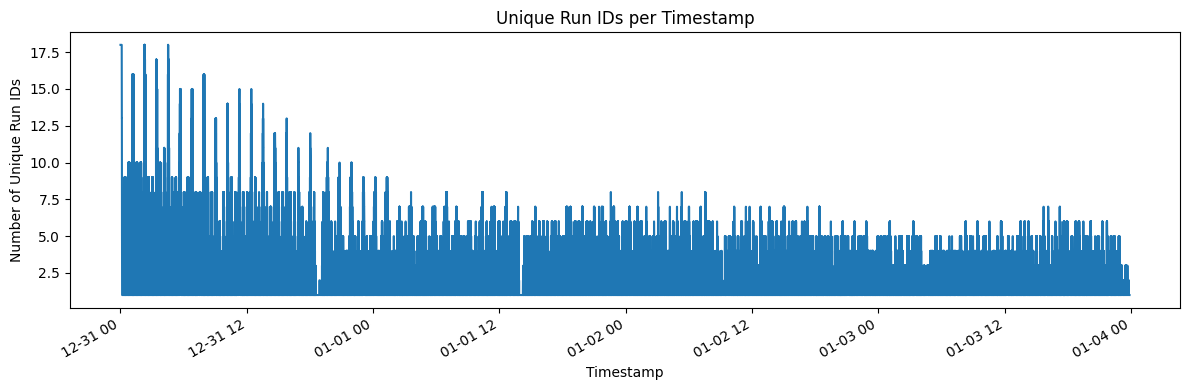

In [208]:
incom_run_counts.plot(figsize=(12, 4), title="Unique Run IDs per Timestamp")
plt.xlabel("Timestamp")
plt.ylabel("Number of Unique Run IDs")
plt.tight_layout()
plt.show()

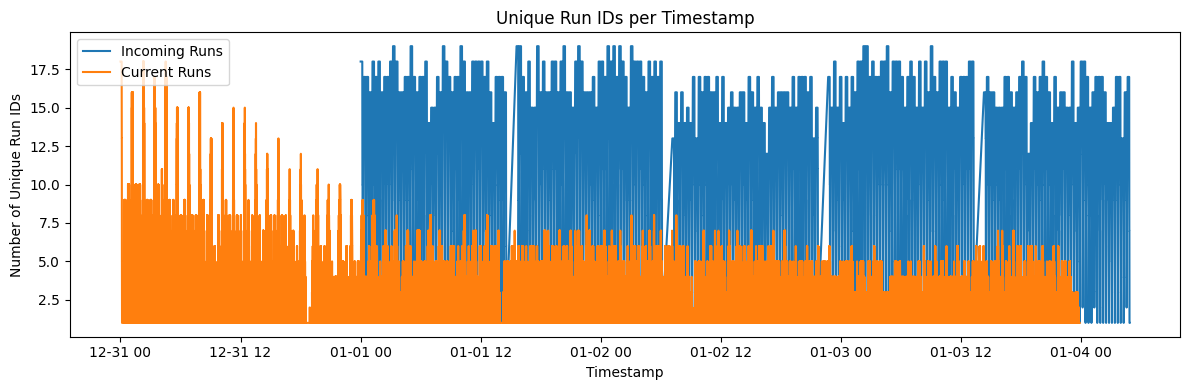

In [210]:

plt.figure(figsize=(12, 4))
plt.plot(run_counts, label='Incoming Runs')        # First line
plt.plot(incom_run_counts, label='Current Runs') # Second line

plt.title("Unique Run IDs per Timestamp")
plt.xlabel("Timestamp")
plt.ylabel("Number of Unique Run IDs")
plt.legend()
plt.tight_layout()
plt.show()

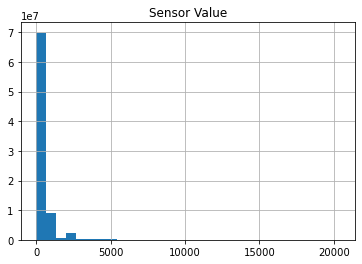

In [43]:
# Distribution plot for Sensor value and Consumable life

df2['Sensor Value'].hist(bins=30, label='Sensor Value')
plt.title('Sensor Value')
plt.show()

In [33]:
correlation = df1.corrwith(df2)
print(correlation)

Sensor Value       0.000046
Consumable Life         NaN
dtype: float64


In [37]:
df3.info()
print("Shape:", df3.shape)
print("Columns:", df3.columns.tolist())
print(df3.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202860 entries, 0 to 202859
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Run ID          202860 non-null  object        
 1   Run Start Time  202860 non-null  datetime64[ns]
 2   Run End Time    202860 non-null  datetime64[ns]
 3   X_index         202860 non-null  int32         
 4   Y_index         202860 non-null  int32         
 5   X               202860 non-null  float64       
 6   Y               202860 non-null  float64       
 7   Point Index     202860 non-null  int64         
 8   Measurement     202860 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int32(2), int64(1), object(1)
memory usage: 12.4+ MB
Shape: (202860, 9)
Columns: ['Run ID', 'Run Start Time', 'Run End Time', 'X_index', 'Y_index', 'X', 'Y', 'Point Index', 'Measurement']
Run ID                    object
Run Start Time    datetime64[ns]
Run End Time  

In [38]:
#check number of null values

df3.isnull().sum()

Run ID            0
Run Start Time    0
Run End Time      0
X_index           0
Y_index           0
X                 0
Y                 0
Point Index       0
Measurement       0
dtype: int64

In [39]:
#check number of duplicated values

df3.duplicated().sum()

0

In [40]:
df3.describe(include='object')

# Value counts
for col in df3.select_dtypes(include='object').columns:
    print(f"\n{col} value counts:\n", df3[col].value_counts())


Run ID value counts:
 00862337-2cc0-5b34-b5e1-45588e935c39    49
cbc68e11-a0ea-5605-86aa-01d7f42ac0fc    49
a547c3de-e71b-53fb-aa49-4e2158ff10b9    49
a58d79fe-cc61-56b8-8037-789d9bfc33e3    49
a5c059e8-8555-5790-8fdd-30ab471e9235    49
                                        ..
54a4ee88-5377-58e3-b756-eb46fd9a6780    49
563fc9ee-06a7-5ff5-95a8-aff9b1dd566f    49
572064e4-52f8-5a4d-b1e6-d7aca1c5d228    49
5766e09c-13f0-5dc8-a866-91ebf6220c5a    49
fec7f5b4-aa67-550d-b1ab-9d9500dd40eb    49
Name: Run ID, Length: 4140, dtype: int64


In [188]:
print('Number of Run ID:', df3["Run ID"].nunique())

Number of Run ID: 4140


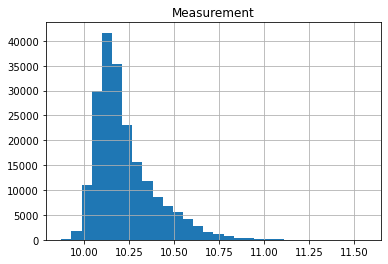

In [42]:
# Distribution plot for Sensor value and Consumable life

df3['Measurement'].hist(bins=30, label='Measurement')
plt.title('Measurement')
plt.show()

In [ ]:
run_counts = meas_df.groupby("Time Stamp")["Run ID"].nunique()
print(run_counts)
# run_counts.to_csv("run_counts_by_timestamp.csv")

# Feature Plots



In [5]:
run_df['Time_utc'] = pd.to_datetime(run_df['Time Stamp'])
run_df.head()

,Tool ID,Run Start Time,Run End Time,Run ID,Process Step,Consumable Life,Step ID,Time Stamp,Sensor Name,Sensor Value,Time_utc
0,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_0,2024-01-01 00:00:00.000000000,Sensor_A,-0.061105,2024-01-01 00:00:00.000000000
1,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_0,2024-01-01 00:00:01.000000002,Sensor_A,-0.040894,2024-01-01 00:00:01.000000002
2,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_0,2024-01-01 00:00:01.999999997,Sensor_A,0.005357,2024-01-01 00:00:01.999999997
3,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_1,2024-01-01 00:00:03.000000000,Sensor_A,-0.029941,2024-01-01 00:00:03.000000000
4,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_1,2024-01-01 00:00:04.000000002,Sensor_A,-0.098098,2024-01-01 00:00:04.000000002


In [ ]:
# You can choose the grouping column — often 'Run ID' or 'Tool ID'
group_col = 'Run ID'  # or 'Run ID' if available

# Standardize time by subtracting the start of each run
run_df['Relative Time'] = run_df.groupby(group_col)['Time Stamp'].transform(lambda x: (x - x.min()).dt.total_seconds())
run_df.head()

,Tool ID,Run Start Time,Run End Time,Run ID,Process Step,Consumable Life,Step ID,Time Stamp,Sensor Name,Sensor Value,Time_utc,Relative Time
0,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_0,2024-01-01 00:00:00.000000000,Sensor_A,-0.061105,2024-01-01 00:00:00.000000000,0.0
1,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_0,2024-01-01 00:00:01.000000002,Sensor_A,-0.040894,2024-01-01 00:00:01.000000002,1.0
2,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_0,2024-01-01 00:00:01.999999997,Sensor_A,0.005357,2024-01-01 00:00:01.999999997,2.0
3,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_1,2024-01-01 00:00:03.000000000,Sensor_A,-0.029941,2024-01-01 00:00:03.000000000,3.0
4,8060e8e1-504a-5138-a9f0-e2770bd61ba1,2024-01-01,2024-01-01 00:12:35,6515456b-05d4-5e6d-b42a-7652a8d671a4,22c8716b-1c14-525a-8c0a-0473ec7aa99e,370.7229,Step_1,2024-01-01 00:00:04.000000002,Sensor_A,-0.098098,2024-01-01 00:00:04.000000002,4.0


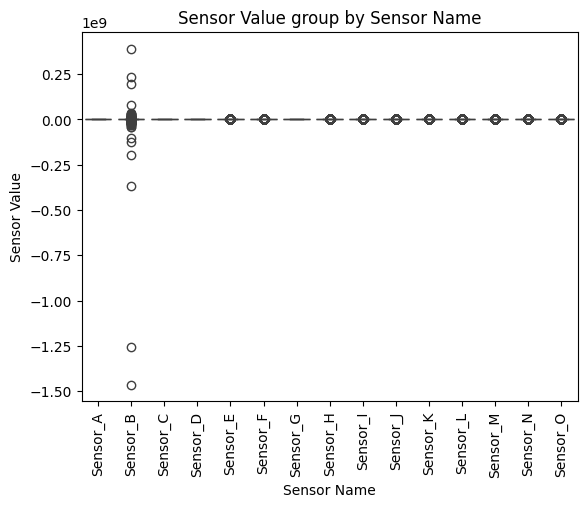

In [8]:
# Plot the graph of sensor value by sensor name
sns.boxplot(x='Sensor Name', y='Sensor Value', data=run_df)
plt.xticks(rotation=90)
plt.title(f'Sensor Value group by Sensor Name')

plt.show()

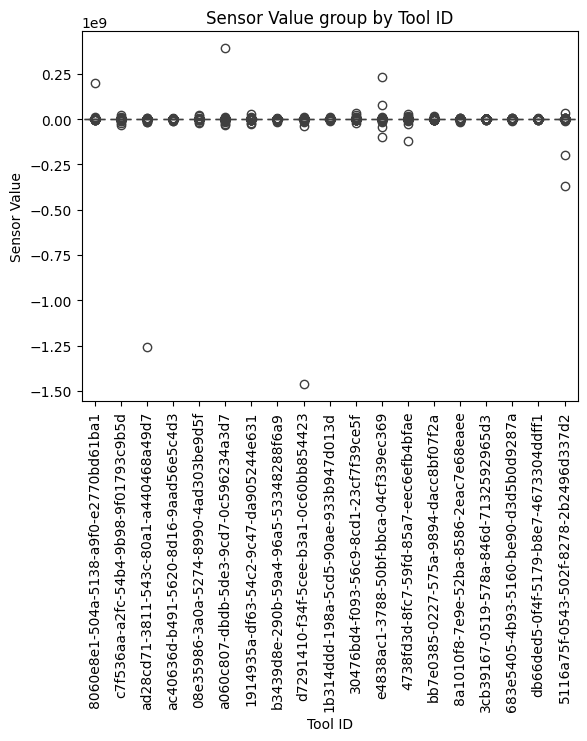

In [9]:
# Plot the graph of sensor value by tool id
sns.boxplot(x='Tool ID', y='Sensor Value', data=run_df)
plt.xticks(rotation=90)
plt.title(f'Sensor Value group by Tool ID')

plt.show()

In [10]:
mean_values = run_df.groupby('Tool ID')['Consumable Life'].mean()
print(mean_values)

Tool ID
08e35986-3a0a-5274-8990-4ad303be9d5f    243.836929
1914935a-df63-54c2-9c47-da905244e631    245.792709
1b314ddd-198a-5cd5-90ae-933b947d013d    255.029633
30476bd4-f093-56c9-8cd1-23cf7f39ce5f    257.020111
3cb39167-0519-578a-846d-7132592965d3    252.814621
4738fd3d-8fc7-59fd-85a7-eec6efb4bfae    242.962997
5116a75f-0543-502f-8278-2b2496d337d2    249.057816
683e5405-4b93-5160-be90-d3d5b0d9287a    256.124512
8060e8e1-504a-5138-a9f0-e2770bd61ba1    256.760284
8a1010f8-7e9e-52ba-8586-2eac7e68eaee    264.033264
a060c807-dbdb-5de3-9cd7-0c596234a3d7    241.627319
ac40636d-b491-5620-8d16-9aad56e5c4d3    251.713470
ad28cd71-3811-543c-80a1-a440468a49d7    236.826462
b3439d8e-290b-59a4-96a5-53348288f6a9    262.474304
bb7e0385-0227-575a-9894-dacc8bf07f2a    254.983871
c7f536aa-a2fc-54b4-9b98-9f01793c9b5d    256.201233
d7291410-f34f-5cee-b3a1-0c60bb854423    257.756073
db66ded5-0f4f-5179-b8e7-4673304ddff1    241.703156
e4838ac1-3788-50bf-bbca-04cf339ec369    253.091583
Name: Consumable Life, 

In [16]:
# for sensor in run_df['Tool ID'].unique():
#     subset_df = run_df[run_df['Tool ID'] == sensor]  # Filter data for each Run ID
    
#     plt.figure(figsize=(8, 6))
#     sns.scatterplot(x='Consumable Life', y='Sensor Value', palette='coolwarm', data=subset_df)
#     plt.legend(title="Tool ID", bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.title(f"Scatter Plot for {sensor}")

#     plt.show()

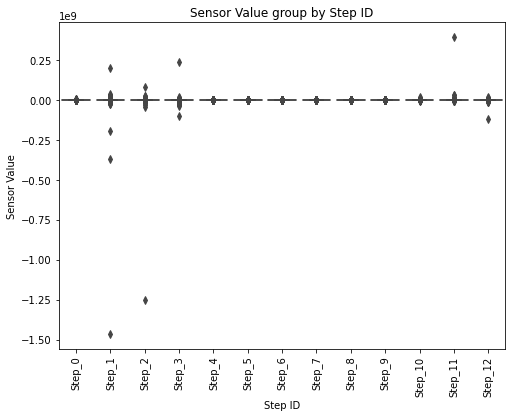

In [33]:
# Plot the graph of sensor value by step id
plt.figure(figsize=(8, 6))  # Adjust figure size
sns.boxplot(x='Step ID', y='Sensor Value', data=run_df)
plt.xticks(rotation=90)
plt.title(f'Sensor Value group by Step ID')

plt.show()

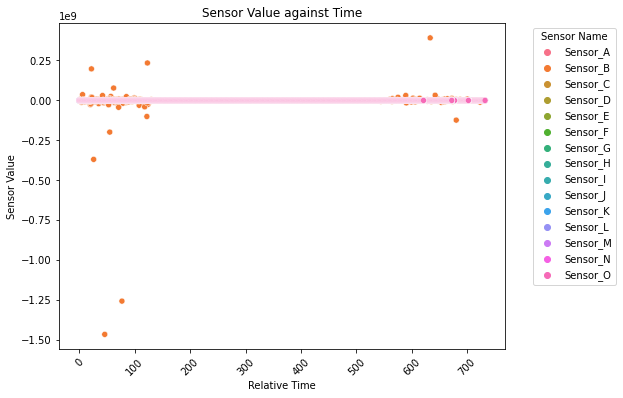

In [16]:
# Plot the graph with categorization
plt.figure(figsize=(8, 6))  # Adjust figure size
sns.scatterplot(x='Relative Time', y='Sensor Value', hue='Sensor Name', data=run_df)

plt.title(f'Sensor Value against Time')
plt.legend(title="Sensor Name", bbox_to_anchor=(1.05, 1), loc='upper left')  # Ensure legend shows sensor categories
plt.xticks(rotation=45)  # Rotate timestamps for readability

# Show the plot
plt.show()

In [ ]:
# # for sensor in run_df['Tool ID'].unique():
# #     subset_df = run_df[run_df['Tool ID'] == sensor]  # Filter data for each Run ID
    
# #     plt.figure(figsize=(8, 6))
# #     sns.scatterplot(x='Time Stamp', y='Sensor Value', hue='Sensor Name', palette='coolwarm', data=subset_df)
# #     plt.legend(title="Step ID", bbox_to_anchor=(1.05, 1), loc='upper left')
# #     plt.title(f"Scatter Plot for {sensor}")
# #     plt.show()

# for sensor_name in run_df['Sensor Name'].unique():
#     subset_df = run_df[run_df['Sensor Name'] == sensor_name]
#     tool_ids = subset_df['Tool ID'].unique()

#     n_tools = len(tool_ids)
#     n_cols = 2  # Adjust this to fit your layout
#     n_rows = int(np.ceil(n_tools / n_cols))

#     fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4), sharex=True)
#     axes = axes.flatten()

#     for i, tool_id in enumerate(tool_ids):
#         tool_df = subset_df[subset_df['Tool ID'] == tool_id]
#         ax = axes[i]

#         sns.scatterplot(x='Relative Time', y='Sensor Value', data=tool_df, ax=ax)
#         ax.set_title(f"Tool ID: {tool_id}")
#         ax.set_xlabel("Time Stamp")
#         ax.set_ylabel("Sensor Value")

#     # Hide unused axes
#     for j in range(i + 1, len(axes)):
#         axes[j].set_visible(False)

#     fig.suptitle(f"Scatter Plots for Sensor: {sensor_name}", fontsize=16)
#     plt.tight_layout(rect=[0, 0, 1, 0.97])
#     plt.show()

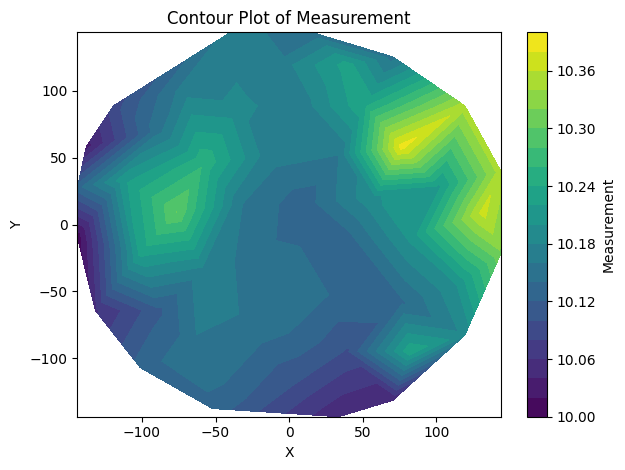

In [179]:
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='X', y='Y', hue='Measurement', palette='coolwarm', data=meas_df)
# plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.title(f"Scatter Plot")
# plt.show()

x = meas_df['X'].values
y = meas_df['Y'].values
z = meas_df['Measurement'].values

# Create triangulation
triang = tri.Triangulation(x, y)

# Plot contour
contour = plt.tricontourf(triang, z, levels=20, cmap='viridis')
plt.colorbar(contour, label='Measurement')
plt.title('Contour Plot of Measurement')
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()


In [181]:
# Number of random run IDs you want to select
num_random_ids = 10

# Select random run IDs
random_meas_ids = meas_df['Run ID'].sample(n=num_random_ids, random_state=42).tolist()

print(random_meas_ids)

# Filter the DataFrame
filtered_meas_df = meas_df[meas_df['Run ID'].isin(random_meas_ids)]

['d9e8e2b9-e355-597b-8890-fbc099945a97', '1ffb435c-4fa1-54cc-b63e-18c3d0ac694c', '42811247-4eac-5cfb-9674-e29cff21f02f', '5e2fbe9f-5b28-5034-bbcb-9e8e8404906b', '6515456b-05d4-5e6d-b42a-7652a8d671a4', '10346130-0ba9-5dd9-8283-ab1cc944e106', 'a542fdfe-8421-5f82-ab8f-9d484968f9a1', '37b76516-cede-5152-b694-384d8ab0315b', '73bbbaa2-f712-554c-80b0-d36abd4a6f85', '2fc8d1b0-5966-5631-a6e7-e3e14a097b4a']


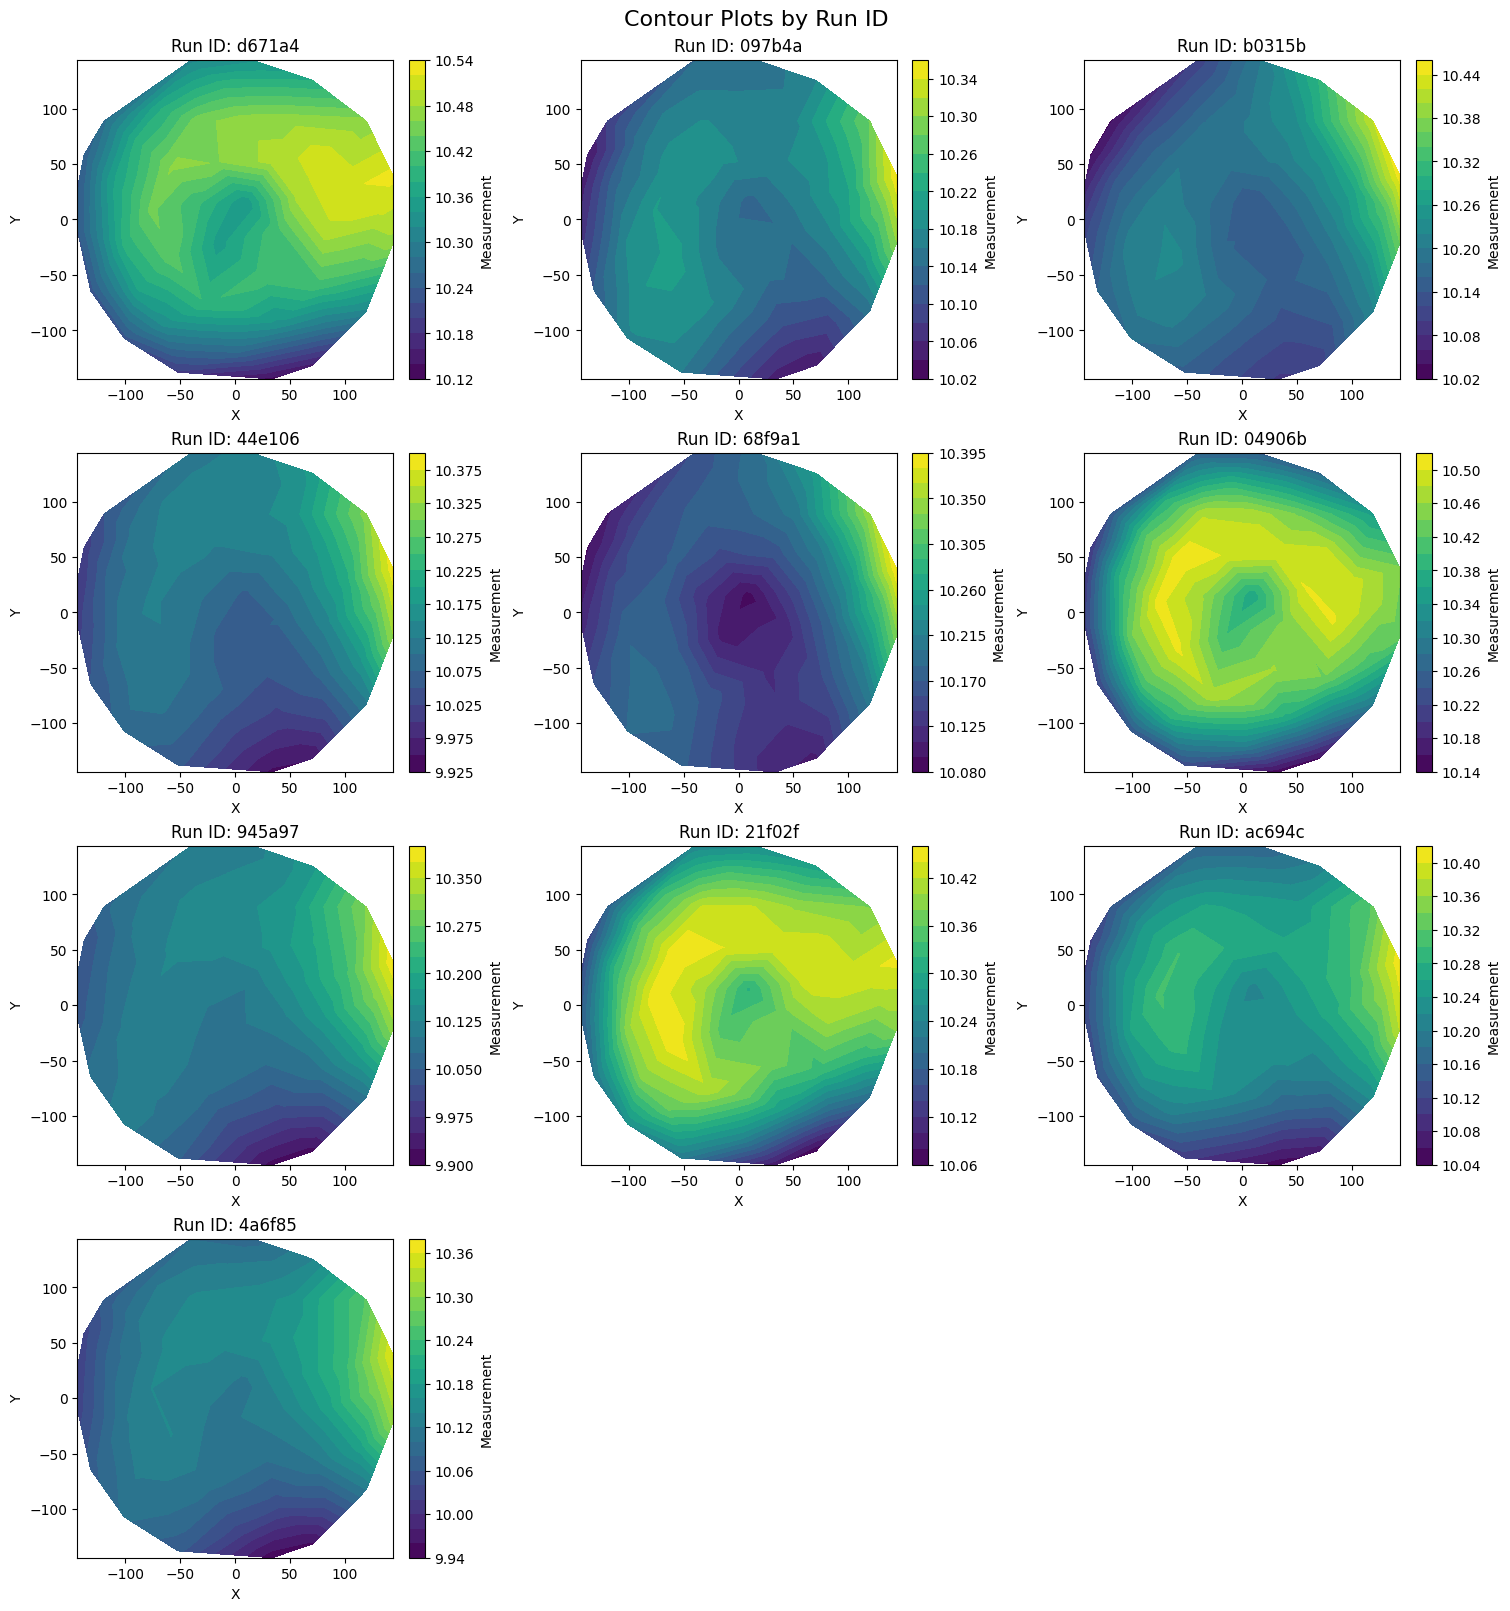

In [ ]:
# Get unique run IDs
run_ids = filtered_meas_df['Run ID'].unique()
n = len(run_ids)

# Determine subplot grid size (e.g., 2 rows, 3 columns for 5 plots)
cols = 3
rows = math.ceil(n / cols)

# Create figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), constrained_layout=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, run_id in enumerate(run_ids):
    ax = axes[i]
    subset_df = filtered_meas_df[filtered_meas_df['Run ID'] == run_id]

    x = subset_df['X'].values
    y = subset_df['Y'].values
    z = subset_df['Measurement'].values

    triang = tri.Triangulation(x, y)
    contour = ax.tricontourf(triang, z, levels=20, cmap='viridis')
    fig.colorbar(contour, ax=ax, label='Measurement')

    ax.set_title(f'Run ID: {run_id[-6:]}')  # Optional: show last few chars of ID
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Contour Plots by Run ID', fontsize=16)
plt.show()

# Aggregate features - sensor


In [12]:
# Check for datetime columns
datetime_cols = meas_df.select_dtypes(include=["datetime64"]).columns
print("Datetime columns:", list(datetime_cols))

# Drop datetime columns from both train and val
meas_df_new = meas_df.drop(columns=datetime_cols)

Datetime columns: ['Run Start Time', 'Run End Time']


In [13]:
# 2. Feature engineering on run_df
# 2a. Aggregate each sensor’s time series per run into summary stats
agg_funcs = ["mean", "std", "min", "max"]
sensor_feats = (
    run_df
      .groupby(["Run ID", "Sensor Name"])["Sensor Value"]
      .agg(agg_funcs)
      .unstack(fill_value=0)
)
# flatten column MultiIndex
sensor_feats.columns = [
    f"{sensor}_{stat}" for sensor, stat in sensor_feats.columns
]
sensor_feats.reset_index(inplace=True)

# Model training on run df + incoming df dataset

In [14]:
#Add incoming run sensor values
agg_funcs = ["mean", "std", "min", "max"]
incoming_feats = (
    incom_run_df
      .groupby(["Run ID", "Sensor Name"])["Sensor Value"]
      .agg(agg_funcs)
      .unstack(fill_value=0)
)
# flatten column MultiIndex
incoming_feats.columns = [
    f"{sensor}_incoming_{stat}" for sensor, stat in incoming_feats.columns
]
incoming_feats.reset_index(inplace=True)
feat = sensor_feats.merge(incoming_feats, on="Run ID")

# Feature engineering - run duration

In [15]:
# Create a 'run_duration' feature by calculating the difference between 'start_time_utc' and 'end_time_utc'
run_df['start_time_utc'] = pd.to_datetime(run_df['Run Start Time'])
run_df['end_time_utc'] = pd.to_datetime(run_df['Run End Time'])
run_df['run_duration'] = (run_df['end_time_utc'] - run_df['start_time_utc']).dt.total_seconds()

In [16]:
# Add the engineered run_duration feature
feat = feat.merge(run_df[['Run ID', 'run_duration']].drop_duplicates(), on='Run ID', how='left')

# Feature engineering - Max Consumable Life

In [17]:
# 2b. Tool-life feature: max ConsumableLife per run
life_feat = (
    run_df
      .groupby("Run ID")["Consumable Life"]
      .max()
      .rename("ConsumableLifeMax")
      .reset_index()
)

# merge features
feat = feat.merge(life_feat, on="Run ID")

# Feature engineering - Tool ID

In [18]:
# 2. Feature engineering on run_df
# 2c. Aggregate each tool's time series per run into summary stats
agg_funcs = ["mean", "std", "min", "max"]
tool_feats = (
    run_df
      .groupby(["Run ID", "Tool ID"])["Sensor Value"]
      .agg(agg_funcs)
      .unstack(fill_value=0)
)
# flatten column MultiIndex
tool_feats.columns = [
    f"{tool}_tool_{stat}" for tool, stat in tool_feats.columns
]

tool_feats.reset_index(inplace=True)
feat = feat.merge(tool_feats, on="Run ID")

# Feature engineering - Process Step

In [19]:
# 2. Feature engineering on run_df
# 2d. Aggregate each process's series per run into summary stats
agg_funcs = ["mean", "std", "min", "max"]
proc_feats = (
    run_df
      .groupby(["Run ID", "Process Step"])["Sensor Value"]
      .agg(agg_funcs)
      .unstack(fill_value=0)
)
# flatten column MultiIndex
proc_feats.columns = [
    f"{proc}_proc_{stat}" for proc, stat in proc_feats.columns
]

proc_feats.reset_index(inplace=True)
feat = feat.merge(proc_feats, on="Run ID")

# Feature engineering - Step ID

In [20]:
# 2. Feature engineering on run_df
# 2e. Aggregate each step’s time series per run into summary stats
agg_funcs = ["mean", "std", "min", "max"]
step_feats = (
    run_df
      .groupby(["Run ID", "Step ID"])["Sensor Value"]
      .agg(agg_funcs)
      .unstack(fill_value=0)
)
# flatten column MultiIndex
step_feats.columns = [
    f"{step}_{stat}" for step, stat in step_feats.columns
]

step_feats.reset_index(inplace=True)
feat = feat.merge(step_feats, on="Run ID")

# Feature engineering - Radius

In [21]:
# Create a 'radius' feature by calculating the distance between point to center of wafer
import math

def distance(row):
     return math.sqrt(row['X']**2 + row['Y']**2)

meas_df['radius'] = meas_df.apply(distance, axis = 1)

print(meas_df.head())

                                 Run ID      Run Start Time  \
0  00862337-2cc0-5b34-b5e1-45588e935c39 2024-01-02 04:45:25   
1  00862337-2cc0-5b34-b5e1-45588e935c39 2024-01-02 04:45:25   
2  00862337-2cc0-5b34-b5e1-45588e935c39 2024-01-02 04:45:25   
3  00862337-2cc0-5b34-b5e1-45588e935c39 2024-01-02 04:45:25   
4  00862337-2cc0-5b34-b5e1-45588e935c39 2024-01-02 04:45:25   

         Run End Time  X_index  Y_index           X          Y  Point Index  \
0 2024-01-02 04:58:00        1       23 -143.877551  -9.183673            3   
1 2024-01-02 04:58:00        1       29 -143.877551  27.551020           48   
2 2024-01-02 04:58:00        2       34 -137.755102  58.163265           43   
3 2024-01-02 04:58:00        3       14 -131.632653 -64.285714           20   
4 2024-01-02 04:58:00        5       39 -119.387755  88.775510            8   

   Measurement      radius  
0    10.006534  144.170349  
1    10.002181  146.491667  
2    10.031223  149.530711  
3    10.055888  146.491667  
4

In [22]:
# 3. Combine with measurement targets
df = meas_df.merge(feat, on="Run ID", how="left")

# drop any runs with missing features (if any)
df.dropna(inplace=True)

In [23]:
df.head()
print("Columns:", df.columns.tolist())


Columns: ['Run ID', 'Run Start Time', 'Run End Time', 'X_index', 'Y_index', 'X', 'Y', 'Point Index', 'Measurement', 'radius', 'mean_Sensor_A', 'mean_Sensor_B', 'mean_Sensor_C', 'mean_Sensor_D', 'mean_Sensor_E', 'mean_Sensor_F', 'mean_Sensor_G', 'mean_Sensor_H', 'mean_Sensor_I', 'mean_Sensor_J', 'mean_Sensor_K', 'mean_Sensor_L', 'mean_Sensor_M', 'mean_Sensor_N', 'mean_Sensor_O', 'std_Sensor_A', 'std_Sensor_B', 'std_Sensor_C', 'std_Sensor_D', 'std_Sensor_E', 'std_Sensor_F', 'std_Sensor_G', 'std_Sensor_H', 'std_Sensor_I', 'std_Sensor_J', 'std_Sensor_K', 'std_Sensor_L', 'std_Sensor_M', 'std_Sensor_N', 'std_Sensor_O', 'min_Sensor_A', 'min_Sensor_B', 'min_Sensor_C', 'min_Sensor_D', 'min_Sensor_E', 'min_Sensor_F', 'min_Sensor_G', 'min_Sensor_H', 'min_Sensor_I', 'min_Sensor_J', 'min_Sensor_K', 'min_Sensor_L', 'min_Sensor_M', 'min_Sensor_N', 'min_Sensor_O', 'max_Sensor_A', 'max_Sensor_B', 'max_Sensor_C', 'max_Sensor_D', 'max_Sensor_E', 'max_Sensor_F', 'max_Sensor_G', 'max_Sensor_H', 'max_Sensor

In [27]:
corr_matrix = df.corr()["Measurement"].sort_values(ascending=False)
print(corr_matrix)

Measurement      1.000000
mean_Sensor_N    0.755044
std_Sensor_N     0.752535
min_Sensor_N     0.749013
max_Sensor_N     0.741277
                   ...   
radius          -0.088230
std_Sensor_E    -0.200163
mean_Sensor_E   -0.201605
max_Sensor_E    -0.206962
run_duration          NaN
Name: Measurement, Length: 365, dtype: float64


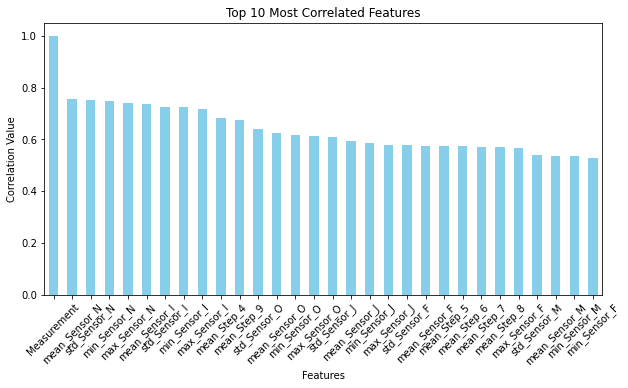

In [29]:
# Select top 30 most correlated features (excluding "Measurement" if needed)
top_10 = corr_matrix.nlargest(30)

# Plot bar chart
plt.figure(figsize=(10, 5))
top_10.plot(kind="bar", color="skyblue")
plt.xlabel("Features")
plt.ylabel("Correlation Value")
plt.title("Top 10 Most Correlated Features")
plt.xticks(rotation=45)
plt.show()

# Model Comparison

Models tested:
1. Lightgbm
2. Random Forest
3. Xboost
4. Catboost

In [24]:
# 4. Train/validation split
X = df.drop(columns=["Run ID", "Measurement"])
y = df["Measurement"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [25]:
# Check for datetime columns
datetime_cols = X_train.select_dtypes(include=["datetime64"]).columns
print("Datetime columns:", list(datetime_cols))

# Drop datetime columns from both train and val
X_train = X_train.drop(columns=datetime_cols)
X_test = X_test.drop(columns=datetime_cols)
X = X.drop(columns=datetime_cols)

Datetime columns: ['Run Start Time', 'Run End Time']


In [26]:
df.head()

,Run ID,Run Start Time,Run End Time,X_index,Y_index,X,Y,Point Index,Measurement,radius,...,max_Step_11,max_Step_12,max_Step_2,max_Step_3,max_Step_4,max_Step_5,max_Step_6,max_Step_7,max_Step_8,max_Step_9
0,00862337-2cc0-5b34-b5e1-45588e935c39,2024-01-02 04:45:25,2024-01-02 04:58:00,1,23,-143.877551,-9.183673,3,10.006534,144.170349,...,39154.363281,66655.40625,3313.342285,212148.0625,9618.930664,10203.958008,10203.882812,10203.904297,10203.899414,10158.020508
1,00862337-2cc0-5b34-b5e1-45588e935c39,2024-01-02 04:45:25,2024-01-02 04:58:00,1,29,-143.877551,27.551020,48,10.002181,146.491667,...,39154.363281,66655.40625,3313.342285,212148.0625,9618.930664,10203.958008,10203.882812,10203.904297,10203.899414,10158.020508
2,00862337-2cc0-5b34-b5e1-45588e935c39,2024-01-02 04:45:25,2024-01-02 04:58:00,2,34,-137.755102,58.163265,43,10.031223,149.530711,...,39154.363281,66655.40625,3313.342285,212148.0625,9618.930664,10203.958008,10203.882812,10203.904297,10203.899414,10158.020508
3,00862337-2cc0-5b34-b5e1-45588e935c39,2024-01-02 04:45:25,2024-01-02 04:58:00,3,14,-131.632653,-64.285714,20,10.055888,146.491667,...,39154.363281,66655.40625,3313.342285,212148.0625,9618.930664,10203.958008,10203.882812,10203.904297,10203.899414,10158.020508
4,00862337-2cc0-5b34-b5e1-45588e935c39,2024-01-02 04:45:25,2024-01-02 04:58:00,5,39,-119.387755,88.775510,8,10.089505,148.776770,...,39154.363281,66655.40625,3313.342285,212148.0625,9618.930664,10203.958008,10203.882812,10203.904297,10203.899414,10158.020508


In [27]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    "objective": "regression",
    "metric": "rmse",
    "verbosity": -1,
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
}

lgb_model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_train, lgb_val],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=100)
    ]
)

Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 0.0340193	valid_1's rmse: 0.0345585
[200]	training's rmse: 0.0259864	valid_1's rmse: 0.0266356
[300]	training's rmse: 0.0230451	valid_1's rmse: 0.0237454
[400]	training's rmse: 0.0213901	valid_1's rmse: 0.0221841
[500]	training's rmse: 0.0202878	valid_1's rmse: 0.0211642
[600]	training's rmse: 0.0193783	valid_1's rmse: 0.0203399
[700]	training's rmse: 0.0185152	valid_1's rmse: 0.019555
[800]	training's rmse: 0.0178128	valid_1's rmse: 0.0189349
[900]	training's rmse: 0.0172415	valid_1's rmse: 0.0184483
[1000]	training's rmse: 0.0167708	valid_1's rmse: 0.0180517
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0167708	valid_1's rmse: 0.0180517


In [28]:
# 6. Evaluate on validation set
y_pred = lgb_model.predict(X_test)

val_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
val_mae = mean_absolute_error(y_test, y_pred)

print(f"Validation RMSE: {val_rmse:.4f}, MAE: {val_mae:.4f}")

Validation RMSE: 0.0181, MAE: 0.0140


In [29]:
pred_val_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_val_df

,Actual,Predicted
73554,10.078344,10.084705
140000,10.262311,10.251043
78039,10.278650,10.295325
68565,10.516511,10.506244
4904,10.272160,10.227631
...,...,...
106757,10.165335,10.147079
18042,10.283431,10.282274
40749,10.221261,10.245410
116080,10.291652,10.329955


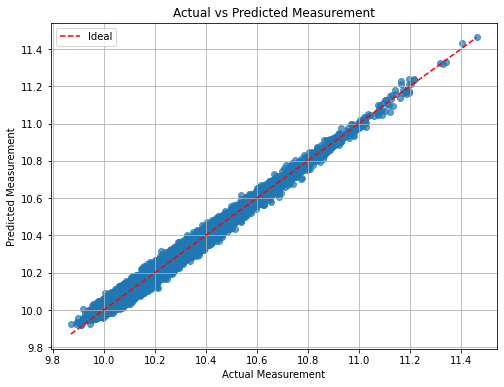

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel("Actual Measurement")
plt.ylabel("Predicted Measurement")
plt.title("Actual vs Predicted Measurement")
plt.legend()
plt.grid(True)
plt.show()

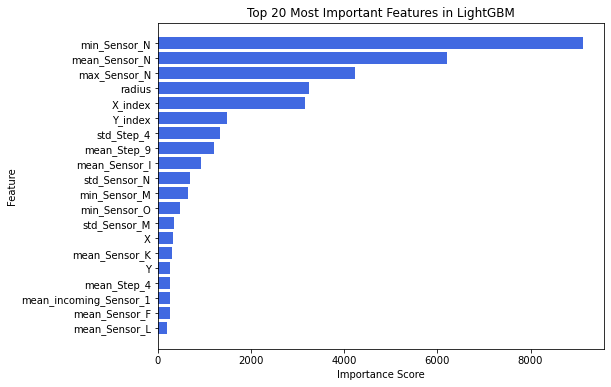

In [37]:
# Get feature importance scores
feature_importance = lgb_model.feature_importance(importance_type='gain')  # Or use 'split'
feature_names = lgb_model.feature_name()

# Create DataFrame for sorting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort and select top 10
top_features = importance_df.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(8, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='royalblue')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 20 Most Important Features in LightGBM")
plt.gca().invert_yaxis()  # Ensures highest importance is at the top
plt.show()

In [38]:
reg = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
reg.fit(X_train, y_train)

# Make predictions
y_pred_reg = reg.predict(X_test)

In [39]:
# Evaluate performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred_reg))
mae = mean_absolute_error(y_test, y_pred_reg)

print(f"Regression RMSE: {rmse:.4f}, MAE: {mae:.4f}")

Regression RMSE: 0.0697, MAE: 0.0524


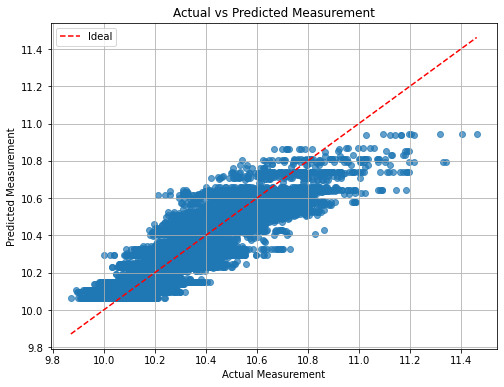

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_reg, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel("Actual Measurement")
plt.ylabel("Predicted Measurement")
plt.title("Actual vs Predicted Measurement")
plt.legend()
plt.grid(True)
plt.show()

In [129]:
# Initialize XGBoost classifier
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False)

# Train model
xgb_model.fit(X_train, y_train)

c:\Users\felic\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [01:30:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Make predictions
y_pred_xboost = xgb_model.predict(X_test)

# Evaluate performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xboost))
mae = mean_absolute_error(y_test, y_pred_xboost)

print(f"Regression RMSE: {rmse:.4f}, MAE: {mae:.4f}")

Regression RMSE: 0.0408


In [133]:
# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on test set
y_pred_lin = lr_model.predict(X_test)

# Evaluate performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lin))
mae = mean_absolute_error(y_test, y_pred_lin)
print(f"Regression RMSE: {rmse:.4f}, MAE: {mae:.4f}")

Regression RMSE: 0.0797


In [137]:
# Initialize CatBoost model
cat_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, verbose=0)

# Train the model
cat_model.fit(X_train, y_train)

In [ ]:
# Predict
y_pred_cat = cat_model.predict(X_test)

# Evaluate with RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_cat))
mae = mean_absolute_error(y_test, y_pred_cat)
print(f"CatBoost Regression RMSE: {rmse:.4f}, MAE: {mae:.4f}")

CatBoost Regression RMSE: 0.0330


In [ ]:
test_incom_run_df  = pd.read_parquet("./test/incoming_run_data.parquet")
test_run_df       = pd.read_parquet("./test/run_data.parquet")
submission_df       = pd.read_parquet("./submission/metrology_data.parquet")

In [60]:
test_run_df.head()

,Tool ID,Run Start Time,Run End Time,Run ID,Process Step,Consumable Life,Step ID,Time Stamp,Sensor Name,Sensor Value,start_time_utc,end_time_utc,run_duration
0,683e5405-4b93-5160-be90-d3d5b0d9287a,2024-01-01 01:27:55,2024-01-01 01:40:30,dac9d86d-8006-5bcf-a10d-dc575bca05fb,22c8716b-1c14-525a-8c0a-0473ec7aa99e,115.641464,Step_0,2024-01-01 01:27:55.000000000,Sensor_A,0.055712,2024-01-01 01:27:55,2024-01-01 01:40:30,755.0
1,683e5405-4b93-5160-be90-d3d5b0d9287a,2024-01-01 01:27:55,2024-01-01 01:40:30,dac9d86d-8006-5bcf-a10d-dc575bca05fb,22c8716b-1c14-525a-8c0a-0473ec7aa99e,115.641464,Step_0,2024-01-01 01:27:56.000000002,Sensor_A,-0.114435,2024-01-01 01:27:55,2024-01-01 01:40:30,755.0
2,683e5405-4b93-5160-be90-d3d5b0d9287a,2024-01-01 01:27:55,2024-01-01 01:40:30,dac9d86d-8006-5bcf-a10d-dc575bca05fb,22c8716b-1c14-525a-8c0a-0473ec7aa99e,115.641464,Step_0,2024-01-01 01:27:56.999999997,Sensor_A,0.030820,2024-01-01 01:27:55,2024-01-01 01:40:30,755.0
3,683e5405-4b93-5160-be90-d3d5b0d9287a,2024-01-01 01:27:55,2024-01-01 01:40:30,dac9d86d-8006-5bcf-a10d-dc575bca05fb,22c8716b-1c14-525a-8c0a-0473ec7aa99e,115.641464,Step_1,2024-01-01 01:27:58.000000000,Sensor_A,-0.066958,2024-01-01 01:27:55,2024-01-01 01:40:30,755.0
4,683e5405-4b93-5160-be90-d3d5b0d9287a,2024-01-01 01:27:55,2024-01-01 01:40:30,dac9d86d-8006-5bcf-a10d-dc575bca05fb,22c8716b-1c14-525a-8c0a-0473ec7aa99e,115.641464,Step_1,2024-01-01 01:27:59.000000002,Sensor_A,0.011077,2024-01-01 01:27:55,2024-01-01 01:40:30,755.0


In [43]:
# 2. Feature engineering on run_df
# 2a. Aggregate each sensor’s time series per run into summary stats
agg_funcs = ["mean", "std", "min", "max"]
test_sensor_feats = (
    test_run_df
      .groupby(["Run ID", "Sensor Name"])["Sensor Value"]
      .agg(agg_funcs)
      .unstack(fill_value=0)
)
# flatten column MultiIndex
test_sensor_feats.columns = [
    f"{sensor}_{stat}" for sensor, stat in test_sensor_feats.columns
]
test_sensor_feats.reset_index(inplace=True)

In [44]:
#Add incoming run sensor values
agg_funcs = ["mean", "std", "min", "max"]
test_incoming_feats = (
    test_incom_run_df
      .groupby(["Run ID", "Sensor Name"])["Sensor Value"]
      .agg(agg_funcs)
      .unstack(fill_value=0)
)
# flatten column MultiIndex
test_incoming_feats.columns = [
    f"{sensor}_incoming_{stat}" for sensor, stat in test_incoming_feats.columns
]
test_incoming_feats.reset_index(inplace=True)
test_feat = test_sensor_feats.merge(test_incoming_feats, on="Run ID")

In [45]:
# Create a 'run_duration' feature by calculating the difference between 'start_time_utc' and 'end_time_utc'
test_run_df['start_time_utc'] = pd.to_datetime(test_run_df['Run Start Time'])
test_run_df['end_time_utc'] = pd.to_datetime(test_run_df['Run End Time'])
test_run_df['run_duration'] = (test_run_df['end_time_utc'] - test_run_df['start_time_utc']).dt.total_seconds()

In [46]:
# Add the engineered run_duration feature
test_feat = test_feat.merge(test_run_df[['Run ID', 'run_duration']].drop_duplicates(), on='Run ID', how='left')

In [47]:
# 2b. Tool-life feature: max ConsumableLife per run
test_life_feat = (
    test_run_df
      .groupby("Run ID")["Consumable Life"]
      .max()
      .rename("ConsumableLifeMax")
      .reset_index()
)

# merge features
test_feat = test_feat.merge(test_life_feat, on="Run ID")

In [50]:
# 2. Feature engineering on run_df
# 2c. Aggregate each tool's time series per run into summary stats
test_agg_funcs = ["mean", "std", "min", "max"]
test_tool_feats = (
    test_run_df
      .groupby(["Run ID", "Tool ID"])["Sensor Value"]
      .agg(agg_funcs)
      .unstack(fill_value=0)
)
# flatten column MultiIndex
test_tool_feats.columns = [
    f"{tool}_tool_{stat}" for tool, stat in test_tool_feats.columns
]

test_tool_feats.reset_index(inplace=True)
test_feat = test_feat.merge(test_tool_feats, on="Run ID")

In [51]:
# 2. Feature engineering on run_df
# 2d. Aggregate each process's series per run into summary stats
agg_funcs = ["mean", "std", "min", "max"]
test_proc_feats = (
    test_run_df
      .groupby(["Run ID", "Process Step"])["Sensor Value"]
      .agg(agg_funcs)
      .unstack(fill_value=0)
)
# flatten column MultiIndex
test_proc_feats.columns = [
    f"{proc}_proc_{stat}" for proc, stat in test_proc_feats.columns
]

test_proc_feats.reset_index(inplace=True)
test_feat = test_feat.merge(test_proc_feats, on="Run ID")

In [52]:
# 2. Feature engineering on run_df
# 2e. Aggregate each step’s time series per run into summary stats
agg_funcs = ["mean", "std", "min", "max"]
test_step_feats = (
    test_run_df
      .groupby(["Run ID", "Step ID"])["Sensor Value"]
      .agg(agg_funcs)
      .unstack(fill_value=0)
)
# flatten column MultiIndex
test_step_feats.columns = [
    f"{step}_{stat}" for step, stat in test_step_feats.columns
]

test_step_feats.reset_index(inplace=True)
test_feat = test_feat.merge(test_step_feats, on="Run ID")

In [55]:
# Create a 'radius' feature by calculating the distance between point to center of wafer
import math

def distance(row):
     return math.sqrt(row['X']**2 + row['Y']**2)

submission_df['radius'] = submission_df.apply(distance, axis = 1)

print(submission_df.head())

                                 Run ID      Run Start Time  \
0  03aa7486-bf62-5d59-b844-5f2d4a4528c4 2024-01-02 16:31:00   
1  03aa7486-bf62-5d59-b844-5f2d4a4528c4 2024-01-02 16:31:00   
2  03aa7486-bf62-5d59-b844-5f2d4a4528c4 2024-01-02 16:31:00   
3  03aa7486-bf62-5d59-b844-5f2d4a4528c4 2024-01-02 16:31:00   
4  03aa7486-bf62-5d59-b844-5f2d4a4528c4 2024-01-02 16:31:00   

         Run End Time  X_index  Y_index           X          Y  Point Index  \
0 2024-01-02 16:43:35        1       23 -143.877551  -9.183673            3   
1 2024-01-02 16:43:35        1       29 -143.877551  27.551020           48   
2 2024-01-02 16:43:35        2       34 -137.755102  58.163265           43   
3 2024-01-02 16:43:35        3       14 -131.632653 -64.285714           20   
4 2024-01-02 16:43:35        5       39 -119.387755  88.775510            8   

   Measurement      radius  
0          NaN  144.170349  
1          NaN  146.491667  
2          NaN  149.530711  
3          NaN  146.491667  
4

In [62]:
# 3. Combine with measurement targets
test_df = submission_df.merge(test_feat, on="Run ID", how="left")


In [74]:
train_cols = set(X_train.columns)
test_cols = set(X_sub.columns)

extra_in_test = test_cols - train_cols
missing_in_test = train_cols - test_cols

print("🔺 Extra columns in test:", extra_in_test)
print("🔻 Missing columns from test:", missing_in_test)

🔺 Extra columns in test: {'mean_tool_2f2816e1-d294-5c4d-a5fa-3d804c46726a', 'max_tool_2f2816e1-d294-5c4d-a5fa-3d804c46726a', 'min_tool_2f2816e1-d294-5c4d-a5fa-3d804c46726a', 'std_tool_2f2816e1-d294-5c4d-a5fa-3d804c46726a'}
🔻 Missing columns from test: set()


In [65]:
# 4. Train/validation split
X_sub = test_df.drop(columns=["Run ID", "Measurement"])
y_sub = test_df["Measurement"]

In [68]:
# Check for datetime columns
datetime_cols = X_sub.select_dtypes(include=["datetime64"]).columns
print("Datetime columns:", list(datetime_cols))

# Drop datetime columns from both train and val
X_sub = X_sub.drop(columns=datetime_cols)

Datetime columns: ['Run Start Time', 'Run End Time']


In [76]:
# 7. Retrain on full dataset and prepare test submission

# retrain on all
test_pred   = lgb_model.predict(X_sub, predict_disable_shape_check=True)

submission = submission_df.copy()
submission["Measurement"] = test_pred
submission.to_csv("submission.csv", index=False)

In [78]:
final_df = pd.read_csv('submission.csv')  # replace with your actual file name
final_df.head()

,Run ID,Run Start Time,Run End Time,X_index,Y_index,X,Y,Point Index,Measurement,radius
0,03aa7486-bf62-5d59-b844-5f2d4a4528c4,2024-01-02 16:31:00,2024-01-02 16:43:35,1,23,-143.877551,-9.183673,3,10.320684,144.170349
1,03aa7486-bf62-5d59-b844-5f2d4a4528c4,2024-01-02 16:31:00,2024-01-02 16:43:35,1,29,-143.877551,27.551020,48,10.307400,146.491667
2,03aa7486-bf62-5d59-b844-5f2d4a4528c4,2024-01-02 16:31:00,2024-01-02 16:43:35,2,34,-137.755102,58.163265,43,10.288010,149.530711
3,03aa7486-bf62-5d59-b844-5f2d4a4528c4,2024-01-02 16:31:00,2024-01-02 16:43:35,3,14,-131.632653,-64.285714,20,10.329946,146.491667
4,03aa7486-bf62-5d59-b844-5f2d4a4528c4,2024-01-02 16:31:00,2024-01-02 16:43:35,5,39,-119.387755,88.775510,8,10.286707,148.776770


In [1]:
# Plot
plt.figure(figsize=(12, 6))
plt.scatter(final_df['Run Start Time'], final_df['Measurement'], alpha=0.7)
plt.xlabel('Run ID')
plt.ylabel('Measurement')
plt.title('Measurement vs Run ID')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [2]:
test_incom_run_df  = pd.read_parquet("./test/incoming_run_data.parquet")
test_run_df       = pd.read_parquet("./test/run_data.parquet")
submission_df       = pd.read_parquet("./submission/metrology_data.parquet")

In [3]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Submission generation for trained WaferBiLSTMModel

def generate_submission(model, device):
    import pandas as pd
    import numpy as np
    import torch

    # Load test input data
    run_data_df    = test_run_df
    incoming_df    = test_incom_run_df
    submission_template = submission_df

    # Step 1: Merge Incoming and Run data
    test_incoming_df['Stage'] = 'incoming'
    test_run_df['Stage'] = 'run'
    test_df = pd.concat([test_incoming_df, test_run_df], ignore_index=True)

    # Step 2: Preprocess using training parameters
    sensor_names = combined_df['Sensor Name'].unique()
    sensor_map = {s: i for i, s in enumerate(sensor_names)}
    test_df['Sensor Index'] = test_df['Sensor Name'].map(sensor_map)
    test_df['Stage Flag'] = test_df['Stage'].map({"incoming": 0, "run": 1})

    test_df = test_df.sort_values(["Run ID", "Time Stamp"])
    test_df["Relative Time"] = test_df.groupby("Run ID")["Time Stamp"].transform(lambda x: (x - x.min()).dt.total_seconds())

    tool_encoder = LabelEncoder()
    run_data_df['Tool ID Encoded'] = tool_encoder.fit_transform(run_data_df['Tool ID'])
    tool_map = run_data_df.groupby("Run ID")["Tool ID Encoded"].first().to_dict()
    cl_map = run_data_df.groupby("Run ID")["Consumable Life"].first().to_dict()

    test_df["Tool ID Encoded"] = test_df["Run ID"].map(tool_map)
    test_df["Consumable Life"] = test_df["Run ID"].map(cl_map)
    test_df["CL_scaled"] = StandardScaler().fit_transform(test_df[["Consumable Life"]].fillna(0))
    test_df["CL_x_Tool"] = test_df["CL_scaled"] * test_df["Tool ID Encoded"].astype(float)

    scaler = StandardScaler()
    test_df["Sensor Value"] = scaler.fit_transform(test_df[["Sensor Value"]])

    MAX_SEQ_LEN = 300
    NUM_SENSORS = len(sensor_names)

    def build_submission_sequence(df):
        seqs = []
        run_ids = []
        for run_id, group in df.groupby("Run ID"):
            group = group.sort_values("Time Stamp")
            sequence = np.zeros((MAX_SEQ_LEN, NUM_SENSORS + 4))
            grouped = group.groupby("Time Stamp")
            for i, (_, ts_group) in enumerate(grouped):
                if i >= MAX_SEQ_LEN:
                    break
                vec = np.zeros(NUM_SENSORS + 4)
                for _, row in ts_group.iterrows():
                    idx = sensor_map[row["Sensor Name"]]
                    vec[idx] = row["Sensor Value"]
                vec[-4] = ts_group["Stage Flag"].iloc[0]
                vec[-3] = ts_group["Consumable Life"].iloc[0]
                vec[-2] = ts_group["Tool ID Encoded"].iloc[0]
                vec[-1] = ts_group["CL_x_Tool"].iloc[0]
                sequence[i] = vec
            seqs.append(sequence)
            run_ids.append(run_id)
        return run_ids, np.array(seqs)

    run_ids, X_sub = build_submission_sequence(test_df)

    model.load_state_dict(torch.load("best_model.pt"))
    model.to(device)
    model.eval()

    all_preds = []
    X_sub_tensor = torch.tensor(X_sub, dtype=torch.float32)
    with torch.no_grad():
        for i in range(0, len(X_sub_tensor), 32):
            batch = X_sub_tensor[i:i+32].to(device)
            preds = model(batch)
            all_preds.append(preds.cpu().numpy())

    submission_preds = np.vstack(all_preds)

    # Build output DataFrame
    submission_out = []
    for run_id, pred in zip(run_ids, submission_preds):
        for point_idx, measurement in enumerate(pred):
            row = submission_template[(submission_template['Run ID'] == run_id) & (submission_template['Point Index'] == point_idx)].iloc[0]
            submission_out.append({
                "X": row['X'],
                "Y": row['Y'],
                "Measurement": measurement,
                "run_id": run_id
            })

    submission_df = pd.DataFrame(submission_out)[['X', 'Y', 'Measurement', 'run_id']]
    submission_df.to_csv("submission2.csv", index=False)
    print("submission.csv saved!")

    generate_submission()